In [47]:
# Importing essential libraries
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout

In [48]:
from keras.callbacks import LearningRateScheduler
import numpy as np
from matplotlib import pyplot as plt

In [102]:
# 
np.random.seed(42)
# Load MNIST dataset from Keras
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

### Before Nomalizing input lables

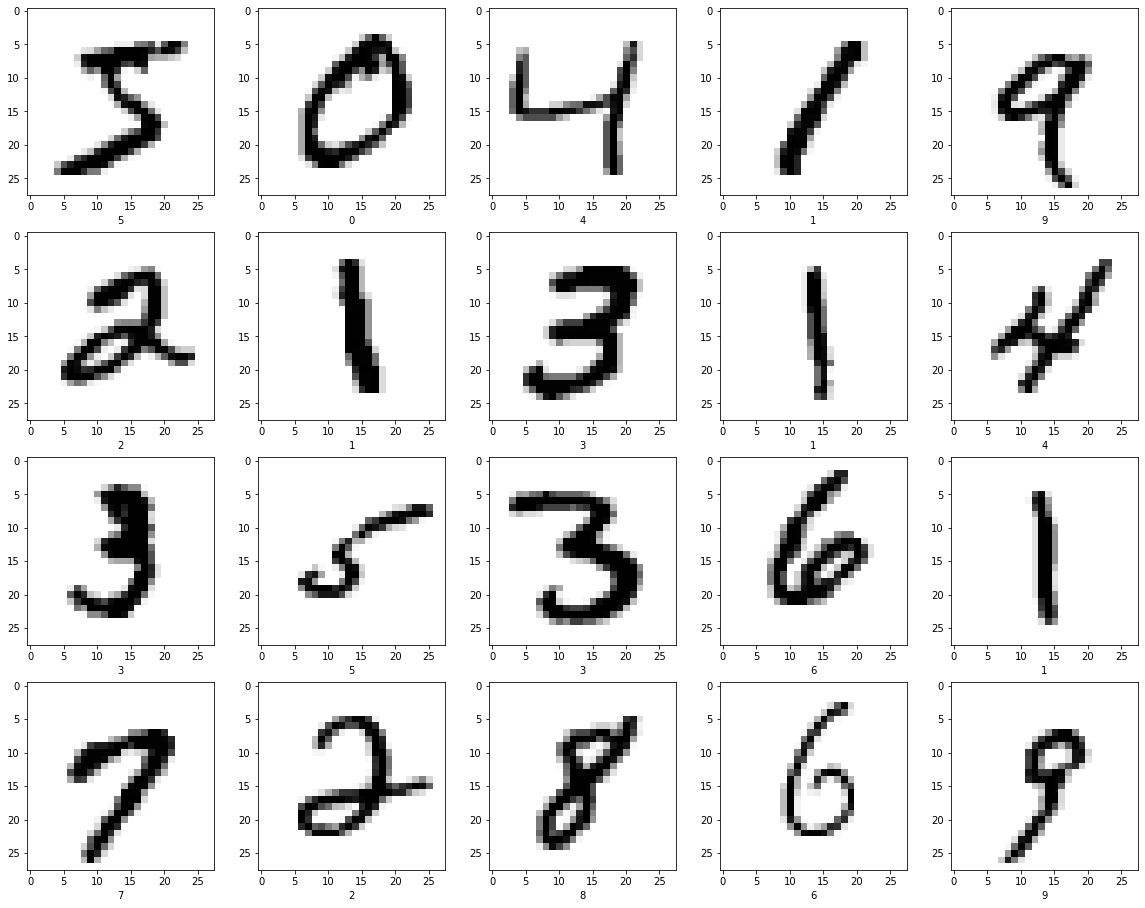

In [103]:
# Plotting the figures in the dataset using Matplotlib
plt.figure(figsize=(20,20))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks()
    plt.yticks()
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

In [104]:
# Data normalization - Step 2
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

### After Normalizing input lables

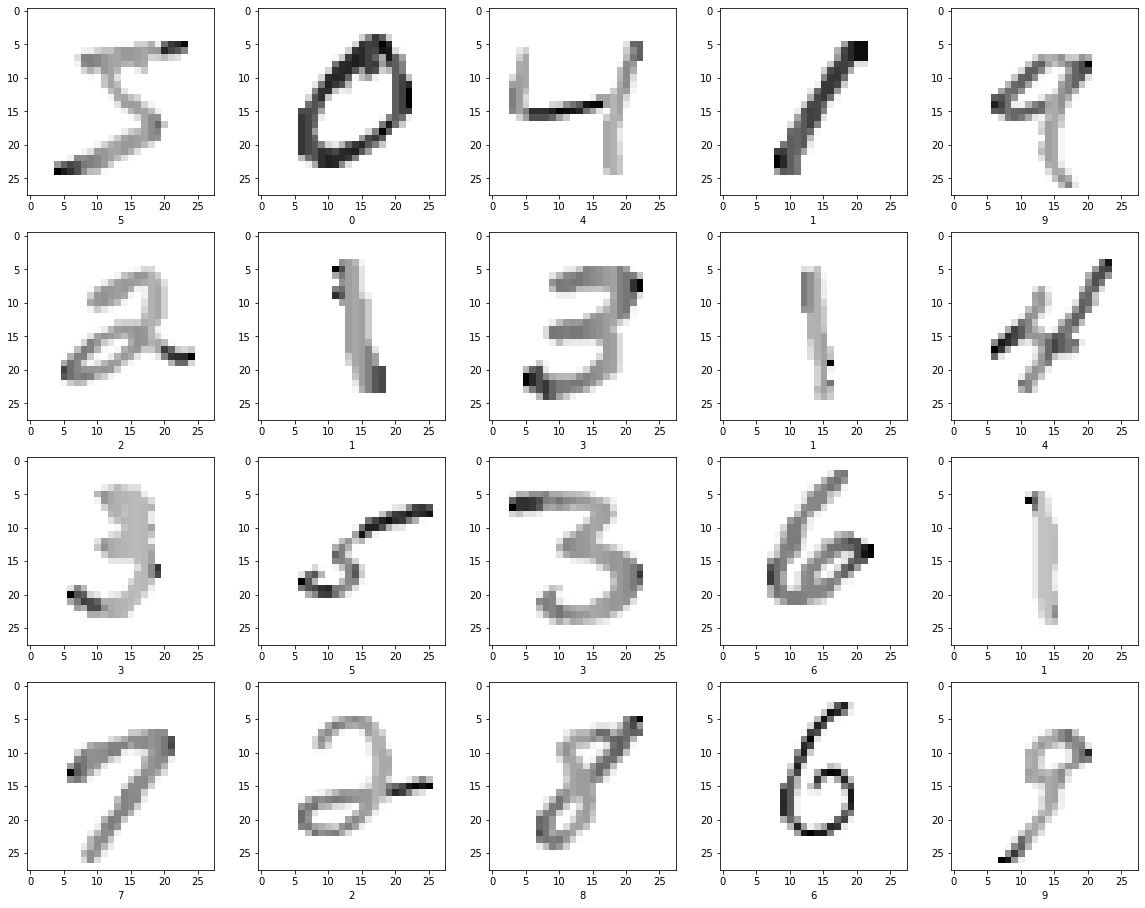

In [105]:
# Plotting the figures in the dataset using Matplotlib
plt.figure(figsize=(20,20))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks()
    plt.yticks()
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

**Observation**: Images are distorted after scalling the dataset as there will be loss of exact data as the values in the 2d matrix are scaled between 0 and 1. However, this will help in impoving the accuracy or in other words, we can reduce the loss and this enables the model to converge towards a decent much faster

In [106]:
# Shape of the input x_train data
print("Shape of the input x_train data before reshaping:")
print("(",x_train.shape[1],",",x_train.shape[2],")")

Shape of the input x_train data before reshaping:
( 28 , 28 )


In [107]:
# Reshaping 2D image data to 1D 
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

### After reshaping to 1D array

In [108]:
# Displaying the shapes of the train and test input datasets 
print("Shape of x_train: ")
print("(", x_train_flattened.shape[1],",", "1)")
print()
print("Shape of x_test: ")
print("(", x_test_flattened.shape[1],",", "1)")

Shape of x_train: 
( 784 , 1)

Shape of x_test: 
( 784 , 1)


In [109]:
# One hot encoding for categorical target labels 
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

Transforming above target labels for a given sample into an array of 1s and 0s where the index of the number 1 indicates the digit the image represents. We do this because otherwise our model would interpret the digit 9 as having a higher priority than the number 3

Neural Network Architecture:
<br>
<br>
Number of classes: 10 (Ten unique digits)
<br>
<br>
Number of layers: 4
<br>
<br>
Number of Nodes in each layer: 64
<br>
<br>
Activation funtions used in each layer: 
- Input layer => Relu
- Hidden layer => Relu
- Output layer => Softmax (multi-class classification problem)

In [308]:
# Stochastic Gradient Decent is being used as an optimizer for this problem 

# Setting the params for Stochastic Gradient Decent
num_classes = 10
epochs = 150
learningRate = 0.1
decay_rate = learningRate/epochs # As the epochs increase the decay rate decreases
momentum_value = 0.8

# Stochastic Gradient Decent for compiling the NN model later
#Default values for SGD. lr=0.1, m=0, decay=0
#Nesterov has stronger theoretical converge guarantees for convex functions.
sgd = keras.optimizers.SGD(learning_rate = learningRate, momentum = momentum_value, decay = decay_rate, nesterov=False)

In [309]:
# Flattened input dimension
input_dim = x_train_flattened.shape[1] # The input layer requires the special input_shape parameter which should match
print("Input shape to be fed into the input layer:", input_dim)

Input shape to be fed into the input layer: 784


In [310]:
# Building the NN model - 1

def define_model():
    
    # Model type selected
    model = Sequential()
    
    # Dense layers are fully connected layers
    # Adding a input dense layer with input number of nodes = 64, Using Relu as activation function, 
    # setting uniform weights to the nodes 
    model.add(Dense(64, activation='relu', kernel_initializer='uniform', input_dim = input_dim)) 
    
    # Adding dropout at this layer as 20% for avoiding overfitting 
    model.add(Dropout(0.2))
    
    # Adding hidden layer with same params
    model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
    
    # Adding the last layer with softmax activation as this is a multi-class classification problem 
    model.add(Dense(num_classes, kernel_initializer='uniform', activation='softmax'))
    
    # Compile the model using loss as categorical_crossentropy as this is a classification problem with the params defined above
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc'])
    
    return model

In [311]:
exp_model = define_model()
print(exp_model.summary())

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 64)                50240     
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_38 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
None


In [312]:
# Exponential decay used instead of static learning rate of 0.1
# 𝑙𝑟 = 𝑙𝑟₀ × 𝑒**(−𝑘𝑡)

def exp_decay(epoch):
    lrate = learningRate * np.exp(-decay_rate*epoch)
    return lrate

In [313]:
# learning schedule callback
lr_rate = LearningRateScheduler(exp_decay)
callbacks_list = [lr_rate]

In [314]:
# List of learning rate from each and every epoch
learning_Rate_for_every_epoch = []
for i in range(0,150):
    learning_Rate_for_every_epoch.append(exp_decay(i))

### Using Relu as activation function

In [316]:
# Fitting the model

# Batch Size 
batch_size = 100

# Fitting model with all params
exp_history = exp_model.fit(x_train_flattened, y_train, batch_size = batch_size, epochs= epochs, callbacks= callbacks_list, verbose=1,
                        validation_data=(x_test_flattened, y_test))

Epoch 1/150
600/600 [==============================] - 1s 2ms/step - loss: 0.7578 - acc: 0.7515 - val_loss: 0.2284 - val_acc: 0.9328
Epoch 2/150
600/600 [==============================] - 1s 2ms/step - loss: 0.2358 - acc: 0.9288 - val_loss: 0.1547 - val_acc: 0.9520
Epoch 3/150
600/600 [==============================] - 1s 2ms/step - loss: 0.1822 - acc: 0.9445 - val_loss: 0.1294 - val_acc: 0.9614
Epoch 4/150
600/600 [==============================] - 1s 2ms/step - loss: 0.1543 - acc: 0.9538 - val_loss: 0.1145 - val_acc: 0.9649
Epoch 5/150
600/600 [==============================] - 1s 2ms/step - loss: 0.1374 - acc: 0.9585 - val_loss: 0.1060 - val_acc: 0.9675
Epoch 6/150
600/600 [==============================] - 1s 2ms/step - loss: 0.1243 - acc: 0.9623 - val_loss: 0.1039 - val_acc: 0.9683
Epoch 7/150
600/600 [==============================] - 1s 2ms/step - loss: 0.1159 - acc: 0.9639 - val_loss: 0.0963 - val_acc: 0.9694
Epoch 8/150
600/600 [==============================] - 1s 1ms/step - 

600/600 [==============================] - 1s 1ms/step - loss: 0.0519 - acc: 0.9841 - val_loss: 0.0836 - val_acc: 0.9762
Epoch 63/150
600/600 [==============================] - 1s 1ms/step - loss: 0.0536 - acc: 0.9829 - val_loss: 0.0836 - val_acc: 0.9761
Epoch 64/150
600/600 [==============================] - 1s 1ms/step - loss: 0.0527 - acc: 0.9826 - val_loss: 0.0835 - val_acc: 0.9758
Epoch 65/150
600/600 [==============================] - 1s 1ms/step - loss: 0.0527 - acc: 0.9833 - val_loss: 0.0821 - val_acc: 0.9753
Epoch 66/150
600/600 [==============================] - 1s 1ms/step - loss: 0.0525 - acc: 0.9833 - val_loss: 0.0829 - val_acc: 0.9763
Epoch 67/150
600/600 [==============================] - 1s 1ms/step - loss: 0.0510 - acc: 0.9836 - val_loss: 0.0825 - val_acc: 0.9759
Epoch 68/150
600/600 [==============================] - 1s 1ms/step - loss: 0.0517 - acc: 0.9839 - val_loss: 0.0822 - val_acc: 0.9760
Epoch 69/150
600/600 [==============================] - 1s 2ms/step - loss:

600/600 [==============================] - 1s 2ms/step - loss: 0.0440 - acc: 0.9858 - val_loss: 0.0853 - val_acc: 0.9759
Epoch 124/150
600/600 [==============================] - 1s 2ms/step - loss: 0.0450 - acc: 0.9856 - val_loss: 0.0848 - val_acc: 0.9759
Epoch 125/150
600/600 [==============================] - 1s 1ms/step - loss: 0.0440 - acc: 0.9862 - val_loss: 0.0846 - val_acc: 0.9764
Epoch 126/150
600/600 [==============================] - 1s 1ms/step - loss: 0.0445 - acc: 0.9856 - val_loss: 0.0850 - val_acc: 0.9763
Epoch 127/150
600/600 [==============================] - 1s 2ms/step - loss: 0.0447 - acc: 0.9859 - val_loss: 0.0852 - val_acc: 0.9763
Epoch 128/150
600/600 [==============================] - 1s 2ms/step - loss: 0.0433 - acc: 0.9867 - val_loss: 0.0852 - val_acc: 0.9761
Epoch 129/150
600/600 [==============================] - 1s 1ms/step - loss: 0.0457 - acc: 0.9853 - val_loss: 0.0854 - val_acc: 0.9758
Epoch 130/150
600/600 [==============================] - 1s 1ms/step 

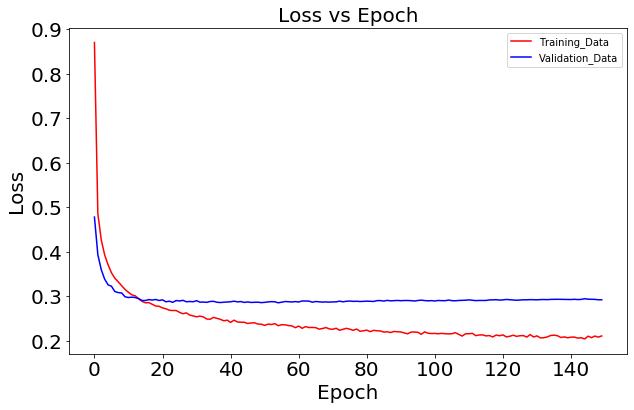

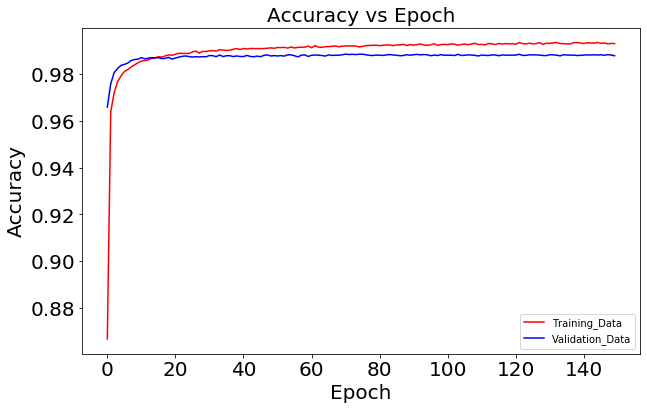

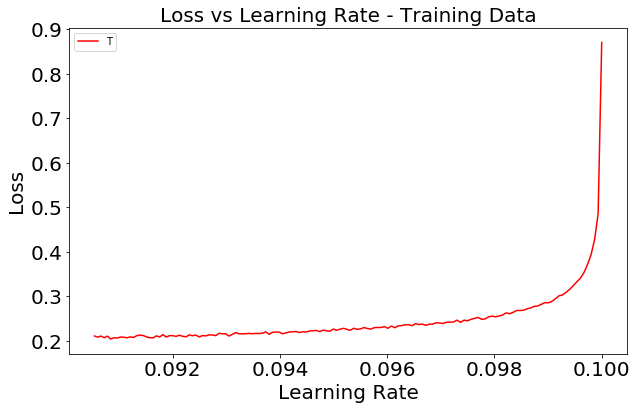

In [317]:
# Plotting for the model with exponential decay

# Plotting the loss function
fig, ax = plt.subplots(1, 1, figsize=(10,6))
plt.title('Loss vs Epoch', fontsize=20)
ax.plot(np.sqrt(exp_history.history['loss']), 'r', label='Training_Data')
ax.plot(np.sqrt(exp_history.history['val_loss']), 'b' ,label='Validation_Data')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# Plotting the accuracy
fig, ax = plt.subplots(1,1, figsize=(10,6))
plt.title('Accuracy vs Epoch', fontsize=20)
ax.plot(np.sqrt(exp_history.history['acc']), 'r', label='Training_Data')
ax.plot(np.sqrt(exp_history.history['val_acc']), 'b' ,label='Validation_Data')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# Plotting the Loss vs Learning Rate of Training data
from matplotlib.pyplot import figure
x = learning_Rate_for_every_epoch
y = np.sqrt(exp_history.history['loss'])
figure(figsize=(10,6))
plt.title('Loss vs Learning Rate - Training Data', fontsize=20)
plt.xlabel('Learning Rate', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.tick_params(labelsize=20)
plt.plot(x, y, color='r')
plt.legend("Training_Data", loc="upper left")
plt.show()


# Plot the loss, ignore 20 batches in the beginning and 5 in the end
# callbacks.lr_finder
# lr_finder = LRFinder(model)
# lr_finder.plot_loss(n_skip_beginning=20, n_skip_end=5)
